In [163]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
folder_path = '/home/ali/DataAnalytics/data-sales-main/data_sales'
files_names = os.listdir(folder_path)

data_list = [pd.read_csv(os.path.join(folder_path, file)) for file in files_names]    # go trought list of file asign eatch file name to it file path 
data_combined = pd.concat(data_list , ignore_index=True) # combine all csv file in one file.csv
print(data_combined.sample(1))


      Order ID                   Product Quantity Ordered Price Each  \
63487   226965  Lightning Charging Cable                1      14.95   

           Order Date                     Purchase Address  
63487  07/09/19 10:35  918 Washington St, Dallas, TX 75001  


In [164]:
data = data_combined
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [165]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [166]:
data.drop_duplicates()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


When I combined all the CSV files into one, I didn't pay attention to the headers, so they were duplicated. That's why I can't convert the 'Price' column to an integer type — it contains strings

In [167]:
expected_headers = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address']
data = data_combined[~data_combined.apply(lambda row: list(row) == expected_headers, axis=1)]


all types here are objects we need to convert  them but first 
we need to clean it 
replace missing values 
let start for change theire  names for readebal 

In [169]:
data.rename(columns={'Order ID' : 'ID',
                    'Quantity Ordered':'Quantity' , 
                    'Price Each':'Price' , 
                    'Order Date':'Date' , 
                    'Purchase Address':'Address'} , inplace = True)
data.columns


/tmp/ipykernel_8666/1782798846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Order ID' : 'ID',


Index(['ID', 'Product', 'Quantity', 'Price', 'Date', 'Address'], dtype='object')

In [170]:
data.isna().sum()

ID          545
Product     545
Quantity    545
Price       545
Date        545
Address     545
dtype: int64

In [171]:
data = data.dropna()

In [172]:

data['Price'] = data['Price'].astype(float)
data['Quantity'] = data['Quantity'].astype(int)
data['Address'] = data['Address'].astype("string")
data['Product'] = data['Product'].astype("string")


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        185950 non-null  object 
 1   Product   185950 non-null  string 
 2   Quantity  185950 non-null  int64  
 3   Price     185950 non-null  float64
 4   Date      185950 non-null  object 
 5   Address   185950 non-null  string 
dtypes: float64(1), int64(1), object(2), string(2)
memory usage: 9.9+ MB


**which month had tbe highest sales**

In [174]:
data.head(3)

,ID,Product,Quantity,Price,Date,Address
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"


In [175]:
# split the Date to isolate the month 
def month(x):
    return x.split('/')[0]
# 07/22/2025 ---> 07 
 

In [176]:
data['months'] = data['Date'].apply(month)

In [177]:
data.columns

Index(['ID', 'Product', 'Quantity', 'Price', 'Date', 'Address', 'months'], dtype='object')

In [178]:
# add a column containts sales [ Quantity * price ]
data['sales'] = data['Quantity'] * data['Price']

In [179]:
data.head()

,ID,Product,Quantity,Price,Date,Address,months,sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99


In [180]:
data.groupby('months')['sales'].sum()

months
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

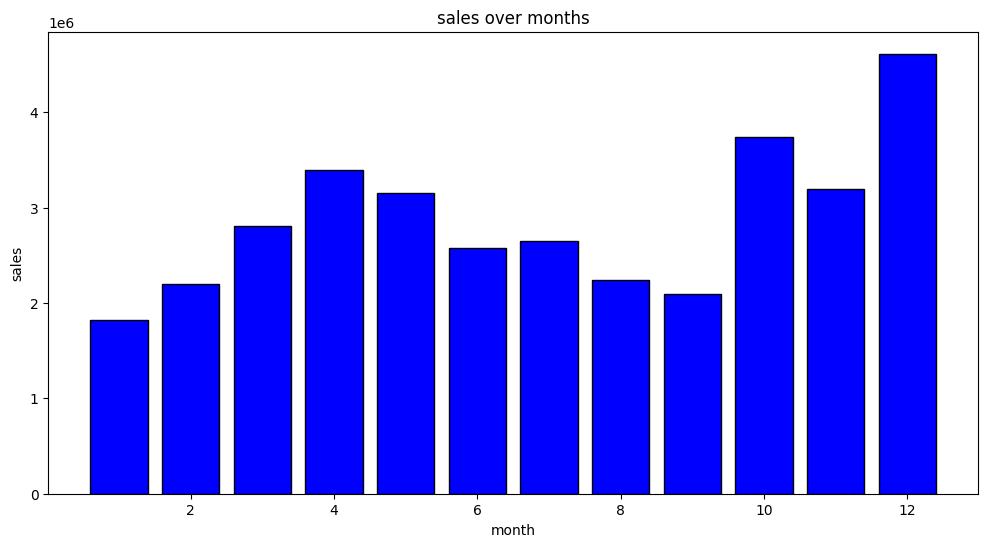

In [181]:
plt.figure(figsize=(12,6))
month = range(1,13)
plt.bar(month,data.groupby('months')['sales'].sum(),color='blue',edgecolor='black')
plt.title("sales over months")
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

**>_which city  had the highest sales_<**

In [182]:
data.head()

,ID,Product,Quantity,Price,Date,Address,months,sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99


In [183]:
# As we can see, the city is the second part of the address when split by commas 
data['city'] = data['Address'].str.split(',').str[1].str.strip()
data['city'].head()

# of by a function  def city(x):
#                      return x.split(',')[1]

0           Austin
1           Austin
2           Austin
3    San Francisco
4    San Francisco
Name: city, dtype: object

In [184]:
data.groupby('city')['sales'].sum()

city
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: sales, dtype: float64

In [185]:
print(data.groupby('city')['sales'].sum().idxmax())

San Francisco


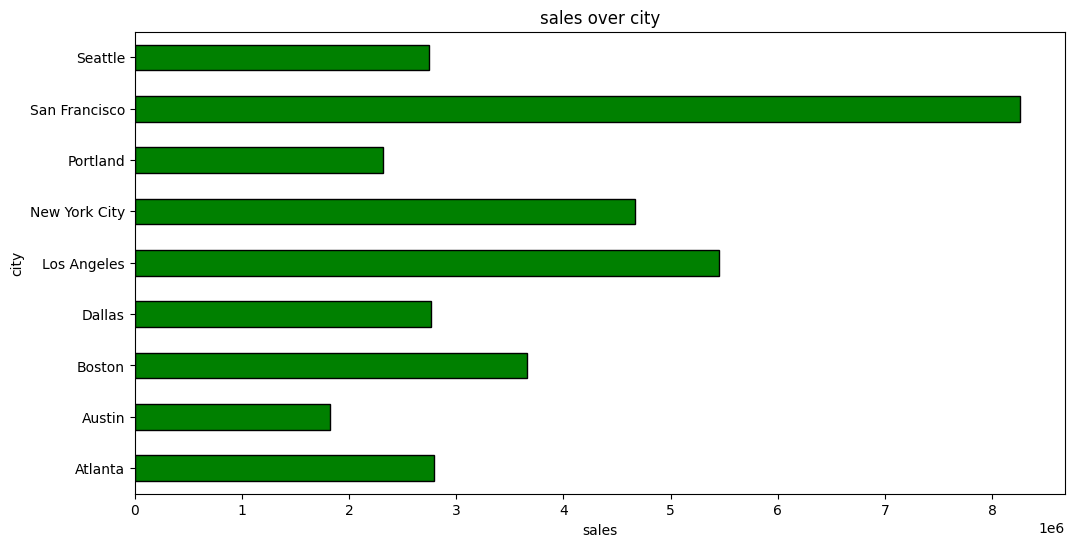

In [186]:
plt.figure(figsize=(12,6))
sales_by_city = data.groupby('city')['sales'].sum()
sales_by_city.plot(kind='barh' ,color='green',edgecolor='black')
plt.title("sales over city")
plt.xlabel('sales')
plt.ylabel('city')
plt.show()

**_What is the best time to publish ads?_**

In [187]:
data.head()

,ID,Product,Quantity,Price,Date,Address,months,sales,city
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00,Austin
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95,Austin
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98,Austin
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99,San Francisco


In [188]:
#As we can see, the time in the Date column is positioned on the second line.
#def time(x):
#    return x.split(' ')[1]
#data['time'] = data['Date'].apply(time)

#data['time'].head()

In [189]:
data['hour'] = pd.to_datetime(data['Date']).dt.hour
data.sample(5)


/tmp/ipykernel_8666/305296269.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['hour'] = pd.to_datetime(data['Date']).dt.hour


,ID,Product,Quantity,Price,Date,Address,months,sales,city,hour
91238,193377,AAA Batteries (4-pack),2,2.99,04/24/19 17:16,"827 Jackson St, Seattle, WA 98101",04,5.98,Seattle,17
84818,187254,AAA Batteries (4-pack),1,2.99,04/17/19 20:21,"352 Adams St, Los Angeles, CA 90001",04,2.99,Los Angeles,20
62262,225802,AA Batteries (4-pack),1,3.84,07/23/19 06:36,"391 6th St, San Francisco, CA 94016",07,3.84,San Francisco,6
153136,259632,Lightning Charging Cable,1,14.95,10/02/19 11:38,"909 Main St, Portland, OR 97035",10,14.95,Portland,11
123369,314138,Bose SoundSport Headphones,1,99.99,12/26/19 16:17,"189 Ridge St, Atlanta, GA 30301",12,99.99,Atlanta,16


In [190]:
data.groupby('hour')['sales'].sum().head()

hour
0    713721.27
1    460866.88
2    234851.44
3    145757.89
4    162661.01
Name: sales, dtype: float64

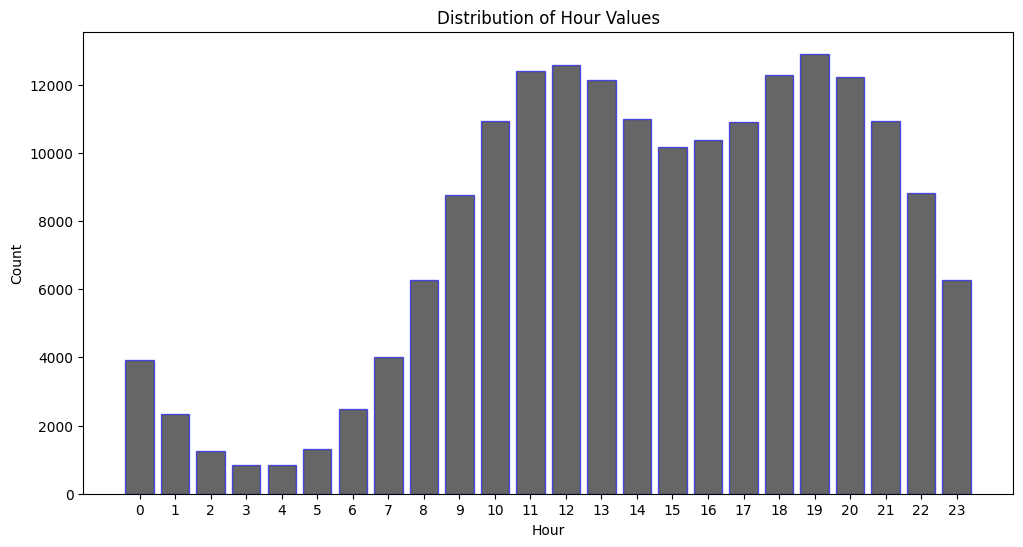

In [191]:
hour_counts = data['hour'].value_counts().sort_index() 
plt.figure(figsize=(12, 6))
plt.bar(hour_counts.index, hour_counts.values, color='black', edgecolor='blue',alpha=0.6)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of Hour Values')
plt.xticks(hour_counts.index)  # show actual hour labels
plt.show()

**_Top 10 best-selling products_**

In [192]:
data.columns

Index(['ID', 'Product', 'Quantity', 'Price', 'Date', 'Address', 'months',
       'sales', 'city', 'hour'],
      dtype='object')

Text(0, 0.5, 'Quanity saled')

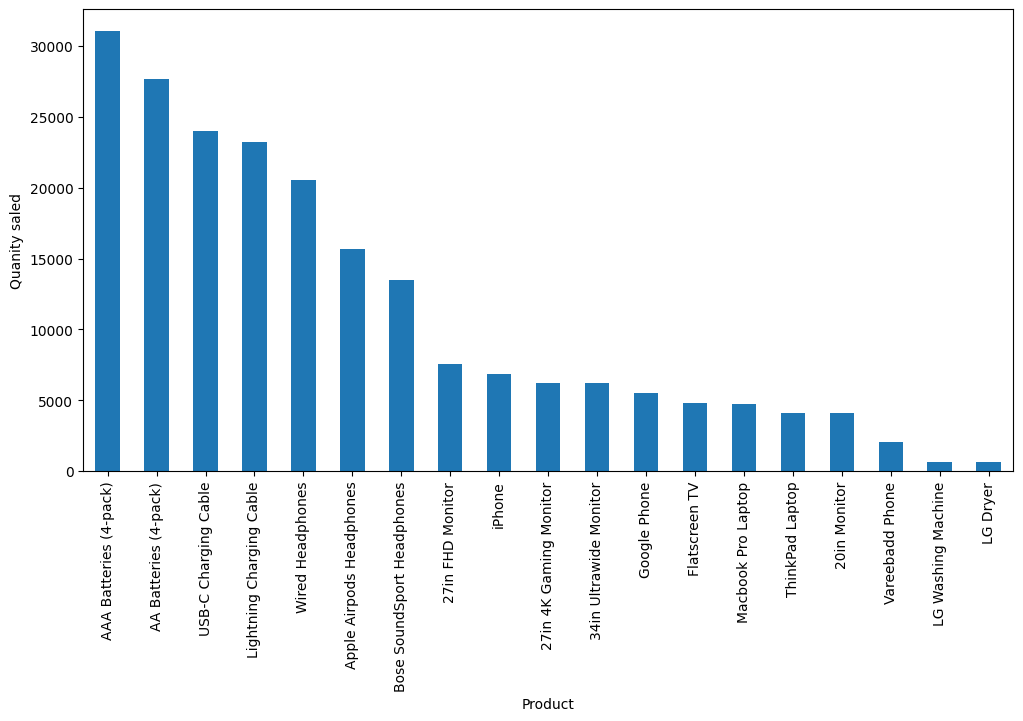

In [193]:
plt.figure(figsize=(12, 6))
data.groupby('Product')['Quantity'].sum().sort_values(ascending=False ).plot(kind='bar')
plt.ylabel('Quanity saled')

**_Compare each product’s sales volume and price._**

The price is expected to be fixed for each product, but due to possible promotions or discounts, we need to consider the average price.

/tmp/ipykernel_8666/3653193546.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product, rotation=45, ha='right')


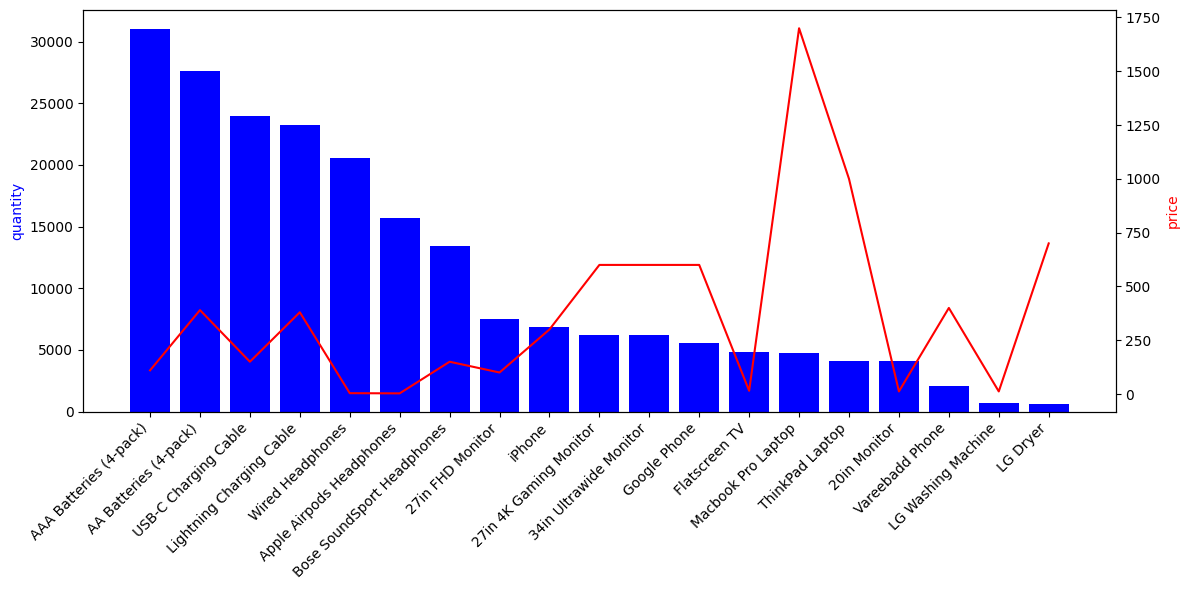

In [194]:
product = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False ).index
quantity =  data.groupby('Product')['Quantity'].sum().sort_values(ascending=False )
price  =  data.groupby('Product')['Price'].mean()


fig,ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.bar(product , quantity , color='blue')
ax1.set_ylabel('quantity' , color='blue')
ax2.plot(product , price , 'r-')
ax2.set_ylabel('price',color='red')
ax1.set_xticklabels(product, rotation=45, ha='right')
plt.tight_layout()
plt.show()



**_What is the relationship between the sales of different products?_**

In [195]:
data.head()

,ID,Product,Quantity,Price,Date,Address,months,sales,city,hour
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00,Austin,20
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95,Austin,20
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98,Austin,20
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99,San Francisco,0


**_as we see above theire is [iphone , cable , headphons] with same id so we need to groubed the duplicated ID_**

In [196]:
duplicated_id = data[data['ID'].duplicated(keep=False)]
data['grouped_product'] = duplicated_id.groupby('ID')['Product'].transform(lambda x: '-'.join(x))

In [197]:
data.head()

,ID,Product,Quantity,Price,Date,Address,months,sales,city,hour,grouped_product
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00,Austin,20,iPhone-Lightning Charging Cable-Wired Headphones
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95,Austin,20,iPhone-Lightning Charging Cable-Wired Headphones
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98,Austin,20,iPhone-Lightning Charging Cable-Wired Headphones
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99,San Francisco,5,NaN
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99,San Francisco,0,NaN


In [198]:
df2 = data.drop_duplicates(subset='ID')
#df2 = data.dropna(subset='grouped_product')
df2.head()

,ID,Product,Quantity,Price,Date,Address,months,sales,city,hour,grouped_product
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00,Austin,20,iPhone-Lightning Charging Cable-Wired Headphones
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99,San Francisco,5,NaN
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99,San Francisco,0,NaN
5,162012,AA Batteries (4-pack),1,3.84,03/20/19 21:33,"187 Ridge St, San Francisco, CA 94016",03,3.84,San Francisco,21,NaN
6,162013,34in Ultrawide Monitor,1,379.99,03/15/19 23:05,"904 Main St, Austin, TX 73301",03,379.99,Austin,23,NaN


<Axes: ylabel='count'>

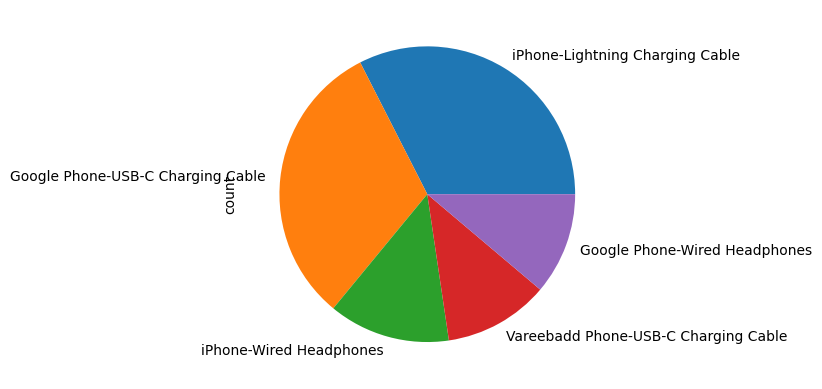

In [199]:
df2['grouped_product'].value_counts()[0:5].sort_values(ascending=False).plot.pie()